<a href="https://colab.research.google.com/github/sabbir-ahmed16/neural-and-fuzzy-sessional/blob/main/1608012_ETE_456_R03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
- To predict diabetes from patient information using different ML algorithms and neural networks

## Objectives
- To perform classification using deep neural network.
- To get familiar with tensorflow and keras frameworks.

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing and Reading the Dataset

In [ ]:
dataset = pd.read_csv("https://www.dropbox.com/s/sglreynnyx40pb6/diabetes.csv?dl=1")

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
dataset.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.shape

(768, 9)

- All the columns contain numerical values.
- There are no rows containing `np.nan` values. Hence there is no missing values to be handled.

#### Separating features and target columns

In [ ]:
features = dataset.drop(['Outcome'], axis=1)
target = dataset[['Outcome']]

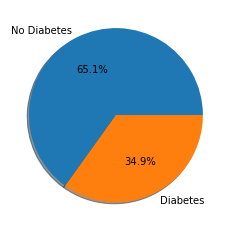

Number of no diabetes cases: 500
Number of diabetes cases: 268


In [ ]:
# Target class distribution
classes = dataset['Outcome'].value_counts()
class_labels = ['No Diabetes', 'Diabetes']

plt.pie(classes, labels=class_labels, shadow=True, autopct='%1.1f%%', startangle=0)
plt.plot('Target Class Distribution')
plt.show()

print(f'Number of no diabetes cases: {classes[0]}')
print(f'Number of diabetes cases: {classes[1]}')

**Though the number of diabetes and no diabetes are not same. Number of diabetes cases are not neglible too. Hence, resampling to achieve balanced dataset is not performed**

In [ ]:
import klib

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

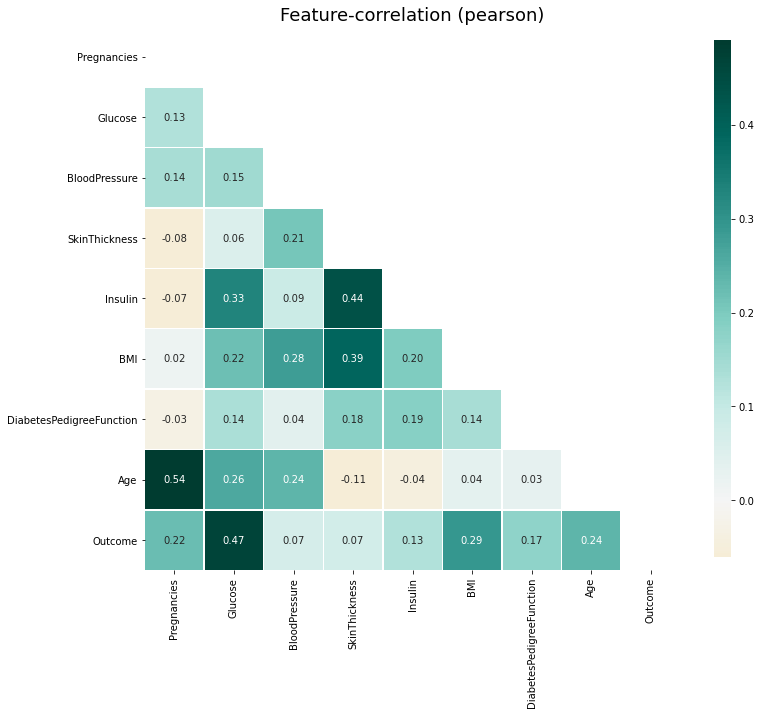

In [ ]:
klib.corr_plot(dataset)

- The highest correlated feature is **Glucose** having score $0.47$ and the lowest correlated features are **Blood Pressure** and **Skin Thickness**.

<font color='green'>***As there is no categorical column, encoding is not necessary***</font>

## Splitting the Dataset

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=4)

print(X_train.shape)
print(X_test.shape)

(652, 8)
(116, 8)


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Building Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 233
Trainable params: 233
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model (Adam Optimizer)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 2s 69ms/step - loss: 0.6856 - accuracy: 0.6321 - val_loss: 0.6817 - val_accuracy: 0.6515
Epoch 2/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6694 - accuracy: 0.6441 - val_loss: 0.6599 - val_accuracy: 0.6515
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.6290 - accuracy: 0.6703 - val_loss: 0.6403 - val_accuracy: 0.6515
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6089 - accuracy: 0.6524 - val_loss: 0.6258 - val_accuracy: 0.6515
Epoch 5/100
19/19 [==============================] - 0s 9ms/step - loss: 0.6014 - accuracy: 0.6452 - val_loss: 0.6123 - val_accuracy: 0.6515
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.5705 - accuracy: 0.6491 - val_loss: 0.6036 - val_accuracy: 0.6515
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.5692 - accuracy: 0.6569 - val_loss: 0.5978 - val_accuracy: 0.6515
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4418 - accuracy: 0.7928 - val_loss: 0.5819 - val_accuracy: 0.7121
Epoch 60/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4076 - accuracy: 0.8264 - val_loss: 0.5844 - val_accuracy: 0.7273
Epoch 61/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4221 - accuracy: 0.8093 - val_loss: 0.5841 - val_accuracy: 0.7121
Epoch 62/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4233 - accuracy: 0.8053 - val_loss: 0.5851 - val_accuracy: 0.7121
Epoch 63/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4229 - accuracy: 0.7963 - val_loss: 0.5870 - val_accuracy: 0.7121
Epoch 64/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4164 - accuracy: 0.8001 - val_loss: 0.5864 - val_accuracy: 0.7121
Epoch 65/100
19/19 [==============================] - 0s 8ms/step - loss: 0.4410 - accuracy: 0.7800 - val_loss: 0.5855 - val_accuracy: 0.7121
Epoch 

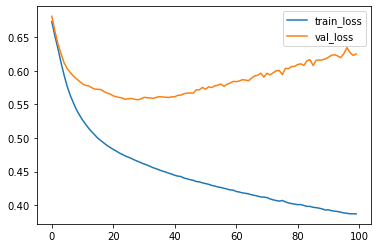

In [ ]:
adam_history_df = pd.DataFrame(history.history)
plt.plot(adam_history_df['loss'], label='train_loss')
plt.plot(adam_history_df['val_loss'], label='val_loss')

plt.legend()

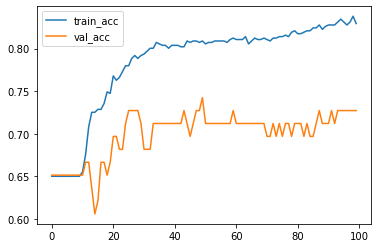

In [ ]:
plt.plot(adam_history_df['accuracy'], label='train_acc')
plt.plot(adam_history_df['val_accuracy'], label='val_acc')

plt.legend()

## Performance Measure

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76        76
           1       0.56      0.68      0.61        40

    accuracy                           0.71       116
   macro avg       0.69      0.70      0.69       116
weighted avg       0.72      0.71      0.71       116



### Compiling the Model (SGD Optimizer)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])

### Training the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 17ms/step - loss: 0.3796 - accuracy: 0.8300 - val_loss: 0.6269 - val_accuracy: 0.7273
Epoch 2/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3694 - accuracy: 0.8394 - val_loss: 0.6275 - val_accuracy: 0.7273
Epoch 3/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3784 - accuracy: 0.8372 - val_loss: 0.6314 - val_accuracy: 0.7273
Epoch 4/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3803 - accuracy: 0.8241 - val_loss: 0.6340 - val_accuracy: 0.7273
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3959 - accuracy: 0.8353 - val_loss: 0.6364 - val_accuracy: 0.7273
Epoch 6/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3791 - accuracy: 0.8464 - val_loss: 0.6361 - val_accuracy: 0.7273
Epoch 7/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3820 - accuracy: 0.8350 - val_loss: 0.6379 - val_accuracy: 0.7273
Epoch 8/100


Epoch 59/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3511 - accuracy: 0.8541 - val_loss: 0.6603 - val_accuracy: 0.7273
Epoch 60/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3411 - accuracy: 0.8677 - val_loss: 0.6623 - val_accuracy: 0.7273
Epoch 61/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3814 - accuracy: 0.8432 - val_loss: 0.6627 - val_accuracy: 0.7121
Epoch 62/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3641 - accuracy: 0.8442 - val_loss: 0.6610 - val_accuracy: 0.7273
Epoch 63/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3609 - accuracy: 0.8452 - val_loss: 0.6626 - val_accuracy: 0.7273
Epoch 64/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3567 - accuracy: 0.8598 - val_loss: 0.6636 - val_accuracy: 0.7121
Epoch 65/100
19/19 [==============================] - 0s 8ms/step - loss: 0.3767 - accuracy: 0.8583 - val_loss: 0.6619 - val_accuracy: 0.7121
Epoch 

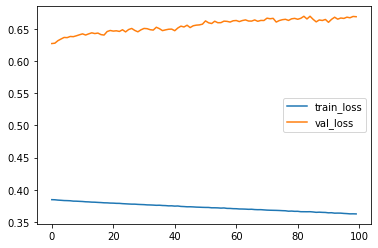

In [ ]:
sgd_history_df = pd.DataFrame(history.history)
plt.plot(sgd_history_df['loss'], label='train_loss')
plt.plot(sgd_history_df['val_loss'], label='val_loss')

plt.legend()

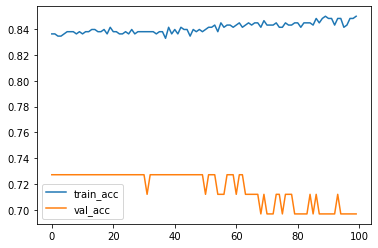

In [ ]:
plt.plot(sgd_history_df['accuracy'], label='train_acc')
plt.plot(sgd_history_df['val_accuracy'], label='val_acc')

plt.legend()

### Performance Measure (SGD)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        76
           1       0.57      0.65      0.60        40

    accuracy                           0.71       116
   macro avg       0.68      0.69      0.69       116
weighted avg       0.72      0.71      0.71       116



### Compiling the Model

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.1)

Epoch 1/100
19/19 [==============================] - 1s 19ms/step - loss: 0.3745 - accuracy: 0.8401 - val_loss: 0.6706 - val_accuracy: 0.6970
Epoch 2/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3709 - accuracy: 0.8312 - val_loss: 0.6673 - val_accuracy: 0.6970
Epoch 3/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3920 - accuracy: 0.8213 - val_loss: 0.6694 - val_accuracy: 0.6970
Epoch 4/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3684 - accuracy: 0.8397 - val_loss: 0.6603 - val_accuracy: 0.7121
Epoch 5/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3709 - accuracy: 0.8428 - val_loss: 0.6775 - val_accuracy: 0.7121
Epoch 6/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3730 - accuracy: 0.8475 - val_loss: 0.6733 - val_accuracy: 0.7121
Epoch 7/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3861 - accuracy: 0.8348 - val_loss: 0.6798 - val_accuracy: 0.7121
Epoch 

19/19 [==============================] - 0s 9ms/step - loss: 0.3275 - accuracy: 0.8608 - val_loss: 0.7103 - val_accuracy: 0.6970
Epoch 59/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3107 - accuracy: 0.8704 - val_loss: 0.7025 - val_accuracy: 0.6970
Epoch 60/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3526 - accuracy: 0.8604 - val_loss: 0.7233 - val_accuracy: 0.6970
Epoch 61/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3170 - accuracy: 0.8635 - val_loss: 0.6997 - val_accuracy: 0.7121
Epoch 62/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3710 - accuracy: 0.8415 - val_loss: 0.7073 - val_accuracy: 0.6970
Epoch 63/100
19/19 [==============================] - 0s 10ms/step - loss: 0.3455 - accuracy: 0.8628 - val_loss: 0.7081 - val_accuracy: 0.7121
Epoch 64/100
19/19 [==============================] - 0s 9ms/step - loss: 0.3366 - accuracy: 0.8771 - val_loss: 0.7193 - val_accuracy: 0.6970
Epoch 65/100
19/1

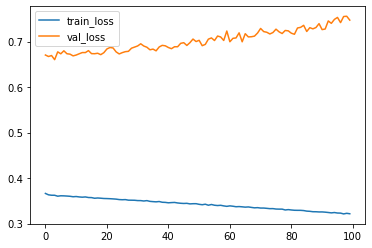

In [ ]:
rms_history_df = pd.DataFrame(history.history)
plt.plot(rms_history_df['loss'], label='train_loss')
plt.plot(rms_history_df['val_loss'], label='val_loss')

plt.legend()

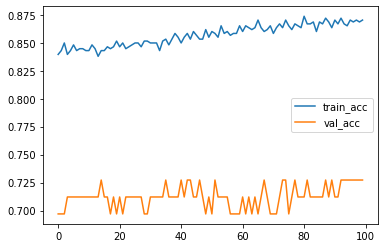

In [ ]:
plt.plot(rms_history_df['accuracy'], label='train_acc')
plt.plot(rms_history_df['val_accuracy'], label='val_acc')

plt.legend()

### Performance Measure (RMSProp)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred = y_pred > 0.5
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77        76
           1       0.57      0.65      0.60        40

    accuracy                           0.71       116
   macro avg       0.68      0.69      0.69       116
weighted avg       0.72      0.71      0.71       116



## Importing ML Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# LOGISTIC REGRESSION
log_model = LogisticRegression(solver='lbfgs', random_state=4)
log_model.fit(X_train, y_train.values.ravel())
log_model_pred = log_model.predict(X_test)


print(f'Classification Report: \n{classification_report(y_test, log_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, log_model_pred)}')

log_model_acc = accuracy_score(y_test, log_model_pred)

print(f'Accuracy of Logistic Regression Model: {log_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        76
           1       0.68      0.65      0.67        40

    accuracy                           0.78       116
   macro avg       0.75      0.75      0.75       116
weighted avg       0.77      0.78      0.77       116

Confusion Matrix: 
[[64 12]
 [14 26]]
Accuracy of Logistic Regression Model: 0.78


In [ ]:
# SUPPORT VECTOR MACHINE
svm_model = SVC(kernel = 'linear', random_state=4, C=1)
svm_model.fit(X_train, y_train.values.ravel())
svm_model_pred = svm_model.predict(X_test)


print(f'Classification Report: \n{classification_report(y_test, svm_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, svm_model_pred)}')

svm_model_acc = accuracy_score(y_test, svm_model_pred)

print(f'Accuracy of Logistic Regression Model: {svm_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        76
           1       0.69      0.62      0.66        40

    accuracy                           0.78       116
   macro avg       0.75      0.74      0.75       116
weighted avg       0.77      0.78      0.77       116

Confusion Matrix: 
[[65 11]
 [15 25]]
Accuracy of Logistic Regression Model: 0.78


In [ ]:
# K-NEAREST NEIGHBOR MODEL
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train.values.ravel())
knn_model_pred = knn_model.predict(X_test)


print(f'Classification Report: \n{classification_report(y_test, knn_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, knn_model_pred)}')

knn_model_acc = accuracy_score(y_test, knn_model_pred)

print(f'Accuracy of Logistic Regression Model: {knn_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        76
           1       0.68      0.65      0.67        40

    accuracy                           0.78       116
   macro avg       0.75      0.75      0.75       116
weighted avg       0.77      0.78      0.77       116

Confusion Matrix: 
[[64 12]
 [14 26]]
Accuracy of Logistic Regression Model: 0.78


In [ ]:
# GAUSSIAN NAIVE BAYES MODEL
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train.values.ravel())
gnb_model_pred = gnb_model.predict(X_test)

print(f'Classification Report: \n{classification_report(y_test, gnb_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, gnb_model_pred)}')

gnb_model_acc = accuracy_score(y_test, gnb_model_pred)

print(f'Accuracy of Logistic Regression Model: {gnb_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        76
           1       0.62      0.62      0.62        40

    accuracy                           0.74       116
   macro avg       0.71      0.71      0.71       116
weighted avg       0.74      0.74      0.74       116

Confusion Matrix: 
[[61 15]
 [15 25]]
Accuracy of Logistic Regression Model: 0.74


In [ ]:
# DECISION TREE MODEL
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=12)
dt_model.fit(X_train, y_train.values.ravel())
dt_model_pred = dt_model.predict(X_test)

print(f'Classification Report: \n{classification_report(y_test, dt_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, dt_model_pred)}')

dt_model_acc = accuracy_score(y_test, dt_model_pred)

print(f'Accuracy of Logistic Regression Model: {dt_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        76
           1       0.51      0.55      0.53        40

    accuracy                           0.66       116
   macro avg       0.63      0.64      0.63       116
weighted avg       0.67      0.66      0.67       116

Confusion Matrix: 
[[55 21]
 [18 22]]
Accuracy of Logistic Regression Model: 0.66


In [ ]:
# RANDOM FOREST MODEL
rf_model = RandomForestClassifier(n_estimators=12, criterion ='entropy', random_state=12)
rf_model.fit(X_train, y_train.values.ravel())
rf_model_pred = rf_model.predict(X_test)


print(f'Classification Report: \n{classification_report(y_test, rf_model_pred)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, rf_model_pred)}')

rf_model_acc = accuracy_score(y_test, rf_model_pred)

print(f'Accuracy of Logistic Regression Model: {rf_model_acc:.2f}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        76
           1       0.72      0.70      0.71        40

    accuracy                           0.80       116
   macro avg       0.78      0.78      0.78       116
weighted avg       0.80      0.80      0.80       116

Confusion Matrix: 
[[65 11]
 [12 28]]
Accuracy of Logistic Regression Model: 0.80


## Findings
- The loss curve shows that with increase in number of iterations, validation loss increases and the validation accuracy in accuracy plot is decreasing which is called overfitting.
- Comparing accuracy of the neural network with ML models, it is seen that the accuracy of logistic regression, svm, knn, gaussian naive bayes, decision tree and random forest models are $78\%$, $78\%$, $78\%$, $74\%$, $66\%$, $80\%$ respectively whereas the highest accuracy obtained from neural network is $71\%$. That means, the ML models are performing better here. This is due to reason that, neural network is a data hungry algorithm. Its accuracy increases with increase in number of samples whereas machine learning models are suitable for comparatively less and complex and small size dataset. Moreover, the problem of overfitting can also be removed to a large extent if the number of samples could be increased.